In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data={'+':np.array([[1,2],[2,3],[3,1.5],[1,2.5]]),
      '*':np.array([[4,5],[5,6],[7,5.5],[5,6.6]])}

In [3]:
data

{'+': array([[1. , 2. ],
        [2. , 3. ],
        [3. , 1.5],
        [1. , 2.5]]), '*': array([[4. , 5. ],
        [5. , 6. ],
        [7. , 5.5],
        [5. , 6.6]])}

In [4]:
# for i in data:
#     print(data[i][:,0],data[i][:,1])

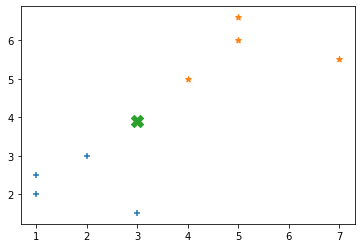

In [5]:
for i in data:
    plt.scatter(data[i][:,0],data[i][:,1],marker=i)
plt.scatter(3,3.9,marker='X',s=150)

In [6]:
from scipy.spatial.distance import euclidean
import pandas as pd

In [7]:
def knn(data,prd):
    dist=[]
    for i in data:
        for pt in data:
            dist.append((euclidean(pt,prd),i))
        v=sorted(dist)[:3]
        

In [8]:
def knn(data,prd):
    dist=[]
    for i in data:
        for pt in data[i]:
            dist.append((euclidean(pt,prd),i))
    v=sorted(dist)[:3]
    votes=[i[1] for i in v]
    d=dict(pd.Series(votes).value_counts())
    return max(d,key=d.get)
knn(data,np.array([4,3.9]))

'*'

In [9]:
dts=pd.read_csv('ucicancer.csv')

In [10]:
dts.columns

Index(['Unnamed: 0', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'class'],
      dtype='object')

In [11]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 12 columns):
Unnamed: 0    698 non-null int64
a             698 non-null int64
b             698 non-null int64
c             698 non-null int64
d             698 non-null int64
e             698 non-null int64
f             698 non-null int64
g             698 non-null object
h             698 non-null int64
i             698 non-null int64
j             698 non-null int64
class         698 non-null int64
dtypes: int64(11), object(1)
memory usage: 65.6+ KB


In [12]:
dts.g.unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [14]:
dts=dts.replace('?',15)
dts['g']=dts['g'].astype(dtype='i')

In [15]:
dts.dtypes

Unnamed: 0    int64
a             int64
b             int64
c             int64
d             int64
e             int64
f             int64
g             int32
h             int64
i             int64
j             int64
class         int64
dtype: object

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=dts.drop(['Unnamed: 0','a','class'],axis=1)
y=dts['class']

In [22]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
x_tr,y_tr

(     b   c   d   e   f   g  h   i   j
 62   6   3   4   1   5   2  3   9   1
 193  3   1   1   1   2   1  3   1   1
 263  7   9   4  10  10   3  5   3   3
 222  7   5   6   3   3   8  7   4   1
 140  2   1   1   1   2   1  1   1   1
 ..  ..  ..  ..  ..  ..  .. ..  ..  ..
 359  6  10  10  10  10  10  8  10  10
 192  1   1   1   1   2   1  3   1   1
 629  6   2   3   1   2   1  1   1   1
 559  5   1   1   1   2   1  3   1   1
 684  1   1   1   1   2   1  1   1   1
 
 [558 rows x 9 columns], 62     4
 193    2
 263    4
 222    4
 140    2
       ..
 359    4
 192    2
 629    2
 559    2
 684    2
 Name: class, Length: 558, dtype: int64)

In [24]:
d=dict.fromkeys(y_tr)
for i in d:
    d[i]=[]
for i in range(x_tr.shape[0]):
    d[y_tr.iloc[i]].append(x_tr.iloc[i].values)

In [25]:
c=0
for i in range(len(x_ts)):
    if knn(d,x_ts.iloc[i])==y_ts.iloc[i]:
        c+=1
c/len(x_ts)

0.9642857142857143

In [26]:
d

{4: [array([6, 3, 4, 1, 5, 2, 3, 9, 1], dtype=int64),
  array([ 7,  9,  4, 10, 10,  3,  5,  3,  3], dtype=int64),
  array([7, 5, 6, 3, 3, 8, 7, 4, 1], dtype=int64),
  array([ 8,  3,  5,  4,  5, 10,  1,  6,  2], dtype=int64),
  array([ 4,  8,  7, 10,  4, 10,  7,  5,  1], dtype=int64),
  array([10, 10, 10,  8,  6,  1,  8,  9,  1], dtype=int64),
  array([10,  8,  8,  2,  8, 10,  4,  8, 10], dtype=int64),
  array([ 8,  8,  9,  4,  5, 10,  7,  8,  1], dtype=int64),
  array([7, 4, 7, 4, 3, 7, 7, 6, 1], dtype=int64),
  array([ 8, 10,  4,  4,  8, 10,  8,  2,  1], dtype=int64),
  array([ 5,  6,  7,  8,  8, 10,  3, 10,  3], dtype=int64),
  array([ 8, 10, 10,  7, 10, 10,  7,  3,  8], dtype=int64),
  array([ 8, 10, 10, 10,  7,  5,  4,  8,  7], dtype=int64),
  array([10, 10, 10, 10, 10, 10,  4, 10, 10], dtype=int64),
  array([ 5, 10, 10, 10,  6, 10,  6,  5,  2], dtype=int64),
  array([ 8,  5,  5,  5,  2, 10,  4,  3,  1], dtype=int64),
  array([10,  7,  7,  4,  5, 10,  5,  7,  2], dtype=int64),
  ar